<a href="https://colab.research.google.com/github/crazat/crazat.githurb.io/blob/main/XAI_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 타이타닉 생존자 데이터셋 다운로드 받아 구글드라이브에 올리기
    - 학습세트: https://drive.google.com/file/d/17DUdpAGVIPJ5_Cghku38YG5ugN6-SiNX/view?usp=sharing
    - 평가세트: https://drive.google.com/file/d/1ZhrzzI81mN_rFWXw68eO2a2NQ8vg8IlZ/view?usp=sharing


- 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 데이터 경로 변수

In [ ]:
DATA_PATH = "/content/drive/MyDrive/머신러닝/data/"
DATA_PATH

'/content/drive/MyDrive/머신러닝/data/'

- 시드값

In [ ]:
SEED = 42

- 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv(f"{DATA_PATH}titanic_train.csv") # 학습데이터
test = pd.read_csv(f"{DATA_PATH}titanic_test.csv") # 테스트 데이터
train.shape , test.shape

((916, 12), (393, 11))

In [ ]:
train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
1,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.0250,NaN,S
3,1130,1,2,"Hiltunen, Miss. Marta",female,18.0,1,1,250650,13.0000,NaN,S
4,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S


- 결측치 확인하기

In [ ]:
train.isnull().sum()

,0
passengerid,0
survived,0
pclass,0
name,0
gender,0
age,180
sibsp,0
parch,0
ticket,0
fare,0


In [ ]:
test.isnull().sum()

,0
passengerid,0
pclass,0
name,0
gender,0
age,83
sibsp,0
parch,0
ticket,0
fare,1
cabin,308


- 학습 데이터에서 얻은 통계량을 이용하여 결측치를 채워야한다.

In [ ]:
age_mean = train["age"].mean() # 평균
fare_median = train["fare"].median() # 중앙값
cabin_unk = "UNK" # 새로운 범주
embarked_mode = train["embarked"].mode()[0] # 최빈값
age_mean , fare_median ,cabin_unk , embarked_mode

(29.904891304347824, 14.5, 'UNK', 'S')

- 학습데이터 결측치 처리

In [ ]:
train["age"] = train["age"].fillna(age_mean)
train["cabin"] = train["cabin"].fillna(cabin_unk)

- 테스트데이터 결측치 처리

In [ ]:
test["age"] = test["age"].fillna(age_mean)
test["fare"] = test["fare"].fillna(fare_median)
test["cabin"] = test["cabin"].fillna(cabin_unk)
test["embarked"] = test["embarked"].fillna(embarked_mode)

In [ ]:
train.isnull().sum().sum() , test.isnull().sum().sum()

(0, 0)

- 특성으로 사용할 변수 추가하기

In [ ]:
cols = ["age","sibsp","parch","fare","pclass","gender","embarked"]
train_ft = train[cols].copy()
test_ft = test[cols].copy() # 테스트 데이터
train_ft.shape, test_ft.shape

((916, 7), (393, 7))

- 범주형 변수 원핫인코딩하여 특성으로 추가하기

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cols = ['gender','embarked']
enc = OneHotEncoder(handle_unknown = 'ignore') # 모르는 범주가 있을 경우 무시
enc.fit(train[cols])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
# 학습 데이터
tmp = pd.DataFrame(
    enc.transform(train_ft[cols]).toarray(), # ndarray
    columns = enc.get_feature_names_out() # 컬럼명
)
train_ft = pd.concat([train_ft,tmp],axis=1)
train_ft.head()

,age,sibsp,parch,fare,pclass,gender,embarked,gender_female,gender_male,embarked_C,embarked_Q,embarked_S
0,71.0,0,0,49.5042,1,male,C,0.0,1.0,1.0,0.0,0.0
1,34.0,0,0,8.0500,3,male,S,0.0,1.0,0.0,0.0,1.0
2,29.0,3,1,22.0250,3,male,S,0.0,1.0,0.0,0.0,1.0
3,18.0,1,1,13.0000,2,female,S,1.0,0.0,0.0,0.0,1.0
4,48.0,0,0,26.5500,1,male,S,0.0,1.0,0.0,0.0,1.0


In [ ]:
# 테스트 데이터
tmp = pd.DataFrame(
    enc.transform(test_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
test_ft = pd.concat([test_ft,tmp],axis=1)
test_ft.head()

,age,sibsp,parch,fare,pclass,gender,embarked,gender_female,gender_male,embarked_C,embarked_Q,embarked_S
0,62.000000,0,0,26.5500,1,male,S,0.0,1.0,0.0,0.0,1.0
1,28.000000,0,0,47.1000,1,male,S,0.0,1.0,0.0,0.0,1.0
2,24.000000,0,0,9.5000,3,male,S,0.0,1.0,0.0,0.0,1.0
3,29.904891,0,0,7.7333,3,female,Q,1.0,0.0,0.0,1.0,0.0
4,18.500000,0,0,7.2833,3,female,Q,1.0,0.0,0.0,1.0,0.0


- 문자열 변수및 gender_male 변수 제거

In [ ]:
cols

['gender', 'embarked']

In [ ]:
cols.append("gender_male")

In [ ]:
cols

['gender', 'embarked', 'gender_male']

In [ ]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)

In [ ]:
train_ft.head()

,age,sibsp,parch,fare,pclass,gender_female,embarked_C,embarked_Q,embarked_S
0,71.0,0,0,49.5042,1,0.0,1.0,0.0,0.0
1,34.0,0,0,8.0500,3,0.0,0.0,0.0,1.0
2,29.0,3,1,22.0250,3,0.0,0.0,0.0,1.0
3,18.0,1,1,13.0000,2,1.0,0.0,0.0,1.0
4,48.0,0,0,26.5500,1,0.0,0.0,0.0,1.0


- Min-Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_ft)

MinMaxScaler()

In [ ]:
train_ft[train_ft.columns] = scaler.transform(train_ft) # 학습 데이터
train_ft.head()

,age,sibsp,parch,fare,pclass,gender_female,embarked_C,embarked_Q,embarked_S
0,0.887260,0.000,0.000000,0.096626,0.0,0.0,1.0,0.0,0.0
1,0.423776,0.000,0.000000,0.015713,1.0,0.0,0.0,0.0,1.0
2,0.361142,0.375,0.111111,0.042990,1.0,0.0,0.0,0.0,1.0
3,0.223350,0.125,0.111111,0.025374,0.5,1.0,0.0,0.0,1.0
4,0.599148,0.000,0.000000,0.051822,0.0,0.0,0.0,0.0,1.0


In [ ]:
test_ft[test_ft.columns] = scaler.transform(test_ft) # 테스트 데이터
test_ft.head()

,age,sibsp,parch,fare,pclass,gender_female,embarked_C,embarked_Q,embarked_S
0,0.774521,0.0,0.0,0.051822,0.0,0.0,0.0,0.0,1.0
1,0.348616,0.0,0.0,0.091933,0.0,0.0,0.0,0.0,1.0
2,0.298509,0.0,0.0,0.018543,1.0,0.0,0.0,0.0,1.0
3,0.372478,0.0,0.0,0.015094,1.0,1.0,0.0,1.0,0.0
4,0.229613,0.0,0.0,0.014216,1.0,1.0,0.0,1.0,0.0


- 정답 데이터

In [ ]:
target = train["survived"]
target

,survived
0,0
1,0
2,0
3,1
4,1
...,...
911,1
912,0
913,0
914,0


- 모델 교차검증 점수 확인하기

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=5,shuffle=True, random_state=SEED)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
model = LGBMClassifier(random_state=SEED) # 모델 객체
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
print(scores) # 폴드별 검증점수 리스트
np.mean(scores) # cv 평균 점수

[0.90031328 0.92617158 0.88740809 0.86368667 0.90095974]


0.8957078739771841

- 모델 학습

In [ ]:
model.fit(train_ft,target)

[LightGBM] [Info] Number of positive: 346, number of negative: 570
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377729 -> initscore=-0.499198
[LightGBM] [Info] Start training from score -0.499198


LGBMClassifier(random_state=42)

- 피처별 중요도 확인
    - 피처의 중요도만 알 수 있다
    - 피처 값에 따른 예측에 변화량 같은 정보를 알 수 없음

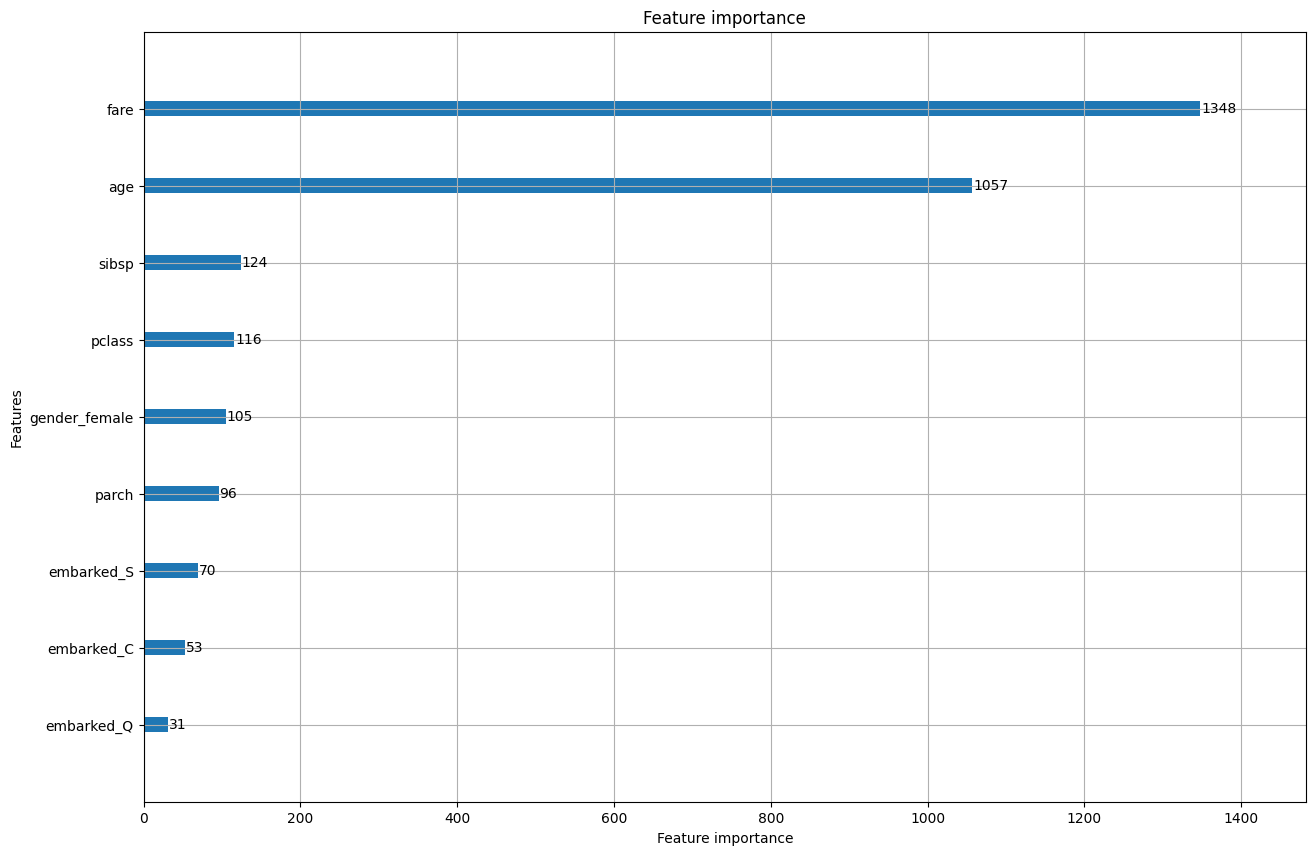

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10)) # figure, axes 객체 생성
plot_importance(model, ax=ax) # 모델및 axes 객체 넣기
plt.show()

# SHAP(Shapley Additive exPlanations)​
- SHAP의 목적은 예측에 대한 각 속성(feature)의 기여도를 계산하여 관측치 x의 예측 값을 설명하는 것​을 말한다.
- Shapley Value를 기반으로 예측 값에 대해 각 피처가 미치는 기여도를 측정하여 예측에 대한 해석을 제공​한다.
- Shapley Value​
    - 게임 이론을 바탕으로 각 피처의 기여도를 계산하는 방법
    - 게임 이론
        - 개인 또는 기업이 어떠한 행위를 했을 때, 그 결과가 게임에서와 같이 자신뿐만 아니라 다른 참가자의 행동에 의해서도 결정되는 상황에서, 자신의 최대 이익에 부합하는 행동을 추구한다는 수학적 이론
    - 계산하고자 하는 피처를 사용했을 때의 예측 값과 사용 안 했을 때의 예측 값의 변화를 이용하여 구한다.
    - Shapley Value를 계산하는 변수가 포함된 가능한 모든 부분집합의 각 예측 값에서 Shapley Value를 계산하는 변수를 제외했을 때에 예측 값의 변화량을 가중 평균한 값이다.
- https://shap.readthedocs.io/en/latest/
- 주피터 노트북 환경에서 설치방법
```python
!pip install shap
```


- 설치하기

In [ ]:
!pip install shap

- import

In [ ]:
import shap

## Explainer 객체생성 및 Shapley Value 계산

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_ft)
shap_values.shape # shap 라이브러리가 업데이트되면서 이진분류에서는 1클래스에 대한 Shapley Value가 ndarray 형태로 반환된다.

/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


(393, 9)

- Local Explanation을 위한 시각화를 위해 Shapley Value가 참조해야하는 기댓값

In [ ]:
expected_value = explainer.expected_value # 1 클래스에 대한 기대값
expected_value

-0.840063948202489

## force_plot
- Local Explanation을 위한 시각화
- 주요 파라미터
    - base_value
        - 첫번째 인수로 expected_value를 넣으면 된다.
    - shap_values
        - 두번째 인수로 Shapley Value를 넣으면 된다.
    - features
        - 세번째 인수로 피처를 넣으면 된다.
    - link
        - 'identity': 기본값으로 예측값을 음수~양수의 실수로 표시함
        - 'logit': 예측값을 확률로 표시

In [ ]:
n = 3 # 샘플 인덱스 번호
shap.initjs() # 자바스크립트로 시각화하는 코드를 노트북에 출력하기 위한 함수
shap.force_plot(expected_value, shap_values[n,:], test_ft.iloc[n,:])

## summary_plot
- Global Explanation을 위한 시각화
- 피처별 중요도와 각 피처가 예측 확률에 어떻게 기여하는지를 분석할 수 있다.

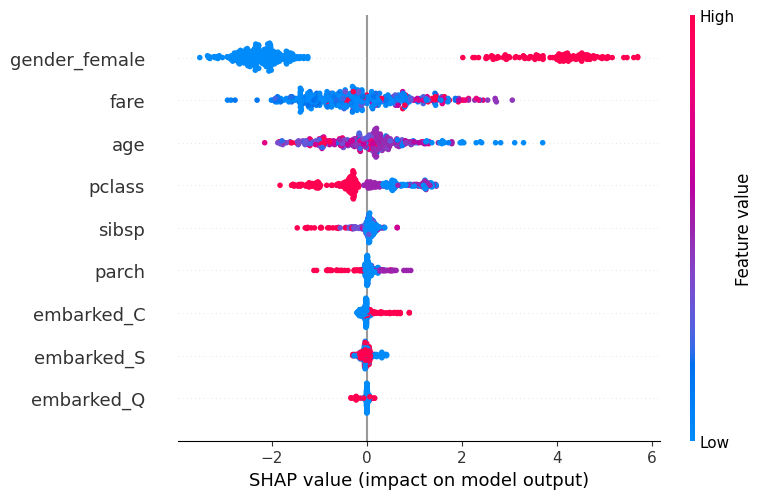

In [ ]:
shap.summary_plot(shap_values,test_ft)

## dependence_plot
- 각 피처의 Shapley Value의 산점도와 높은 상호작용을 하는 피처를 분석할 수 있다.
- 주요 파라미터
    - ind
        -  int or string
    - shap_values
        - 두번째 인수로 Shapley Value를 넣으면 된다.
    - features
        - 세번째 인수로 피처를 넣으면 된다.
    - interaction_index
        - "auto"(default), None, int, or string

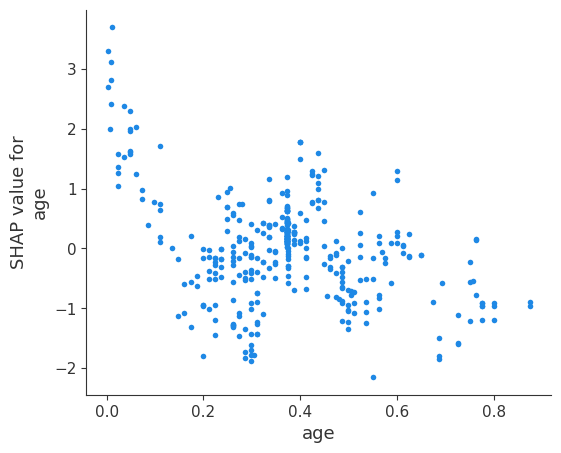

In [ ]:
shap.dependence_plot("age", shap_values, test_ft,interaction_index=None)

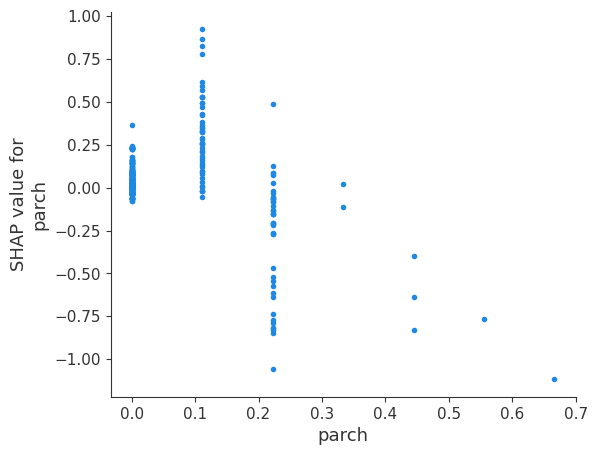

In [ ]:
shap.dependence_plot("parch", shap_values, test_ft,interaction_index=None)

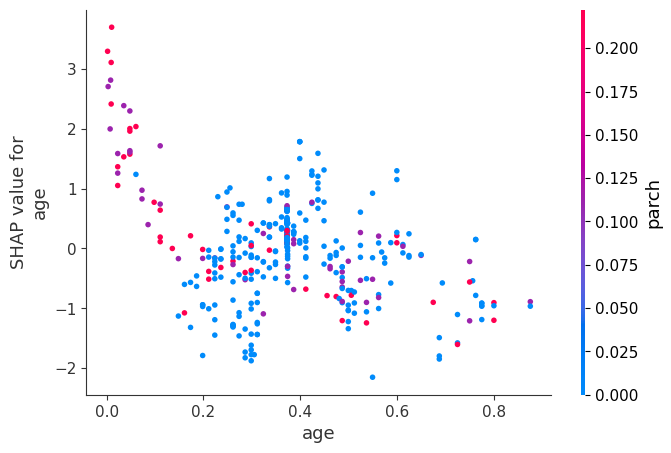

In [ ]:
shap.dependence_plot("age", shap_values, test_ft,interaction_index="parch")

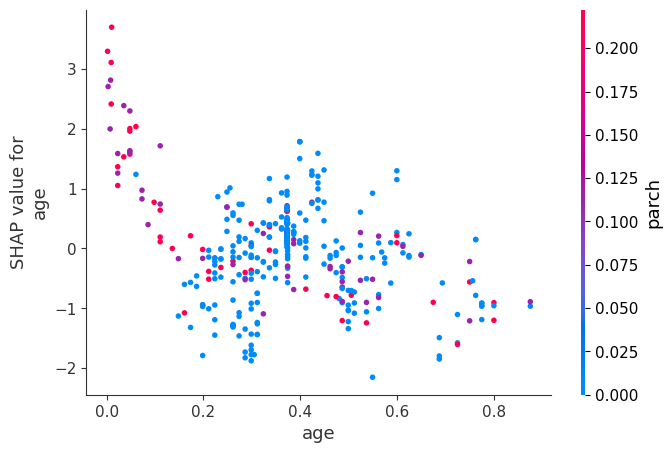

In [ ]:
shap.dependence_plot("age", shap_values, test_ft) # interaction_index="auto"

- 반복문으로 모든 컬럼 분석하기

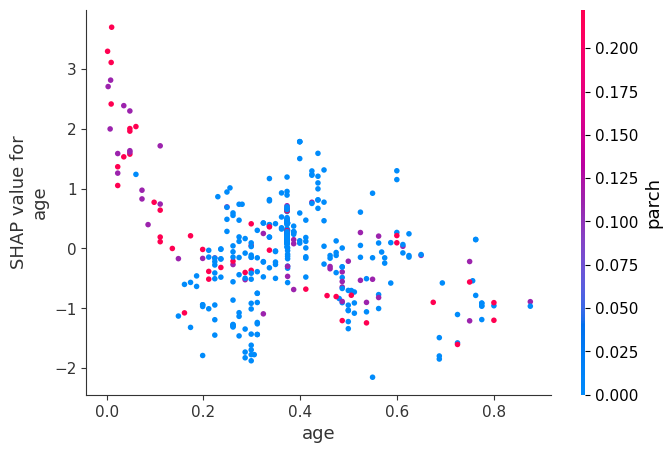

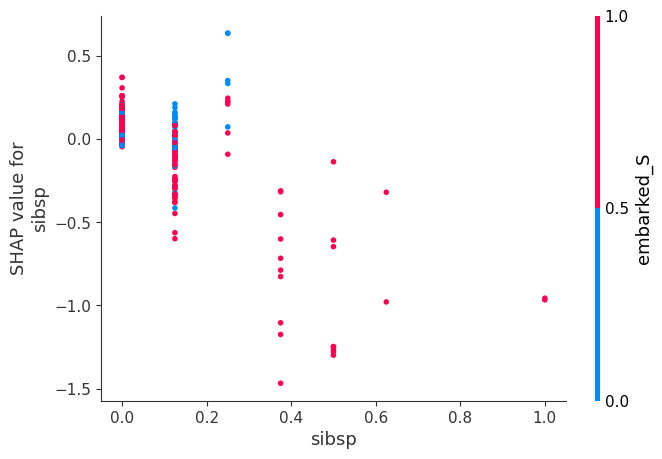

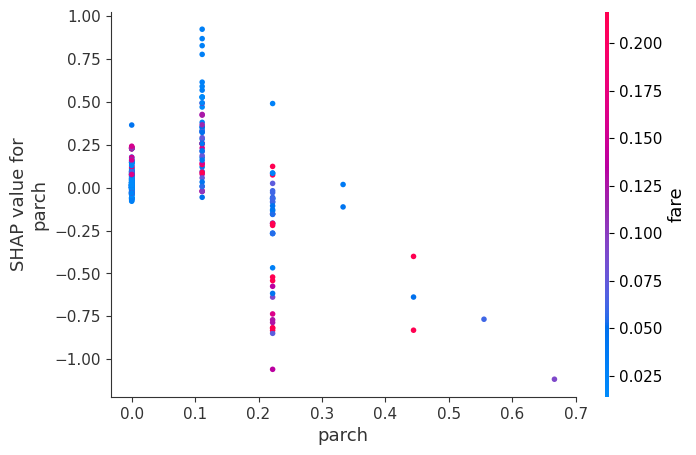

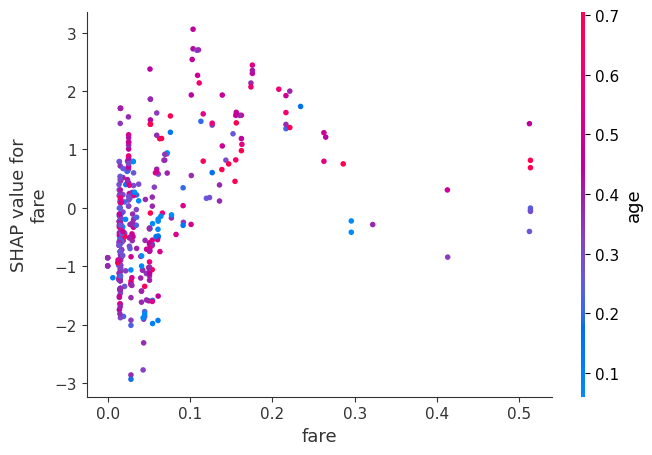

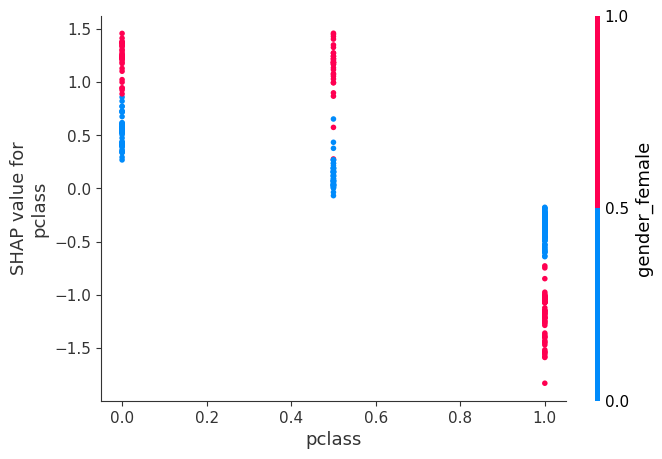

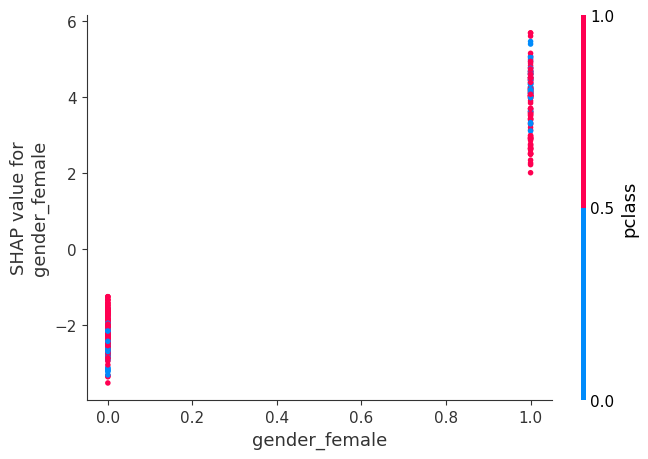

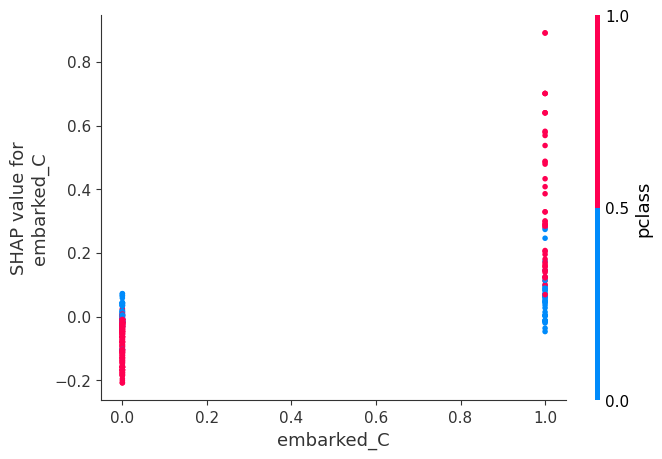

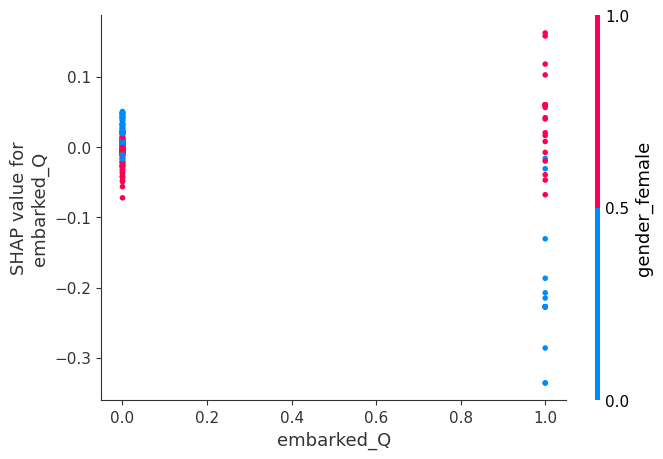

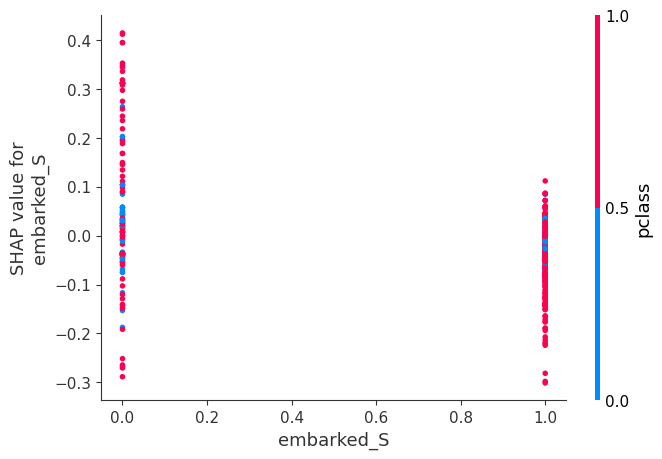

In [ ]:
for col in test_ft.columns:
    shap.dependence_plot(col, shap_values, test_ft)
    print()

# 회귀 모델에 대해서 shap 패키지로 분석해보기

- 보험료 예측 데이터셋 다운로드 받아 구글드라이브에 올리기
    - 개인의 여러 특징을 기반으로 미래의 의료비를 예측하여 보험사에서 보험료 청구 결정을 내리는데 활용
    - 학습세트: https://drive.google.com/file/d/11O7IiJNZo3rsAfnPl6PPIIERbSOxHxh8/view?usp=sharing
    - 평가세트: https://drive.google.com/file/d/18r6qXql5ARvbJCspqJ5qds_yv7LztvXI/view?usp=sharing

In [ ]:
train = pd.read_csv(f"{DATA_PATH}insurance_train.csv") # 학습데이터
test = pd.read_csv(f"{DATA_PATH}insurance_test.csv") # 테스트 데이터
train.shape , test.shape

((936, 7), (402, 6))

In [ ]:
train.head()

,age,sex,bmi,children,smoker,region,target
0,37,male,36.190,0,no,southeast,19214.70553
1,18,male,29.370,1,no,southeast,1719.43630
2,28,male,26.980,2,no,northeast,4435.09420
3,47,male,36.200,1,no,southwest,8068.18500
4,32,male,27.835,1,no,northwest,4454.40265


- 특성으로 사용할 변수 추가하기

In [ ]:
cols = ["age","bmi","children"]
train_ft = train[cols].copy()
test_ft = test[cols].copy()

- 범주형 컬럼 고유값 확인

In [ ]:
train["sex"].unique() , train["smoker"].unique()  , train["region"].unique()

(array(['male', 'female'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['southeast', 'northeast', 'southwest', 'northwest'], dtype=object))

- sex, smoker 컬럼 0과1로 인코딩하여 피쳐추가

In [ ]:
train_ft["sex"] = train["sex"].map(lambda x : int(x == "male") )
train_ft["smoker"] = train["smoker"].map(lambda x : int(x == "yes"))

test_ft["sex"] = test["sex"].map(lambda x : int(x == "male") )
test_ft["smoker"] = test["smoker"].map(lambda x : int(x == "yes"))

- 범주형 변수 원핫인코딩하여 특성으로 추가하기

In [ ]:
cols = ['region']
enc = OneHotEncoder(handle_unknown = 'ignore') # 모르는 범주가 있을 경우 무시
enc.fit(train[cols])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
tmp = pd.DataFrame(
    enc.transform(train[cols]).toarray(), # ndarray
    columns = enc.get_feature_names_out() # 컬럼명
)
train_ft = pd.concat([train_ft,tmp],axis=1)
train_ft.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,37,36.190,0,1,0,0.0,0.0,1.0,0.0
1,18,29.370,1,1,0,0.0,0.0,1.0,0.0
2,28,26.980,2,1,0,1.0,0.0,0.0,0.0
3,47,36.200,1,1,0,0.0,0.0,0.0,1.0
4,32,27.835,1,1,0,0.0,1.0,0.0,0.0


In [ ]:
# 테스트 데이터
tmp = pd.DataFrame(
    enc.transform(test[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
test_ft = pd.concat([test_ft,tmp],axis=1)
test_ft.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,43,26.030,0,1,0,1.0,0.0,0.0,0.0
1,54,27.645,1,0,0,0.0,1.0,0.0,0.0
2,53,24.320,0,1,0,0.0,1.0,0.0,0.0
3,23,28.310,0,0,1,0.0,1.0,0.0,0.0
4,49,25.840,2,1,1,0.0,1.0,0.0,0.0


- 결측치 처리

In [ ]:
train_ft.isnull().sum().sum() , test_ft.isnull().sum().sum()

(0, 0)

- Min-Max Scaling

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_ft)

MinMaxScaler()

In [ ]:
train_ft[train_ft.columns] = scaler.transform(train_ft) # 학습 데이터
train_ft.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.413043,0.544256,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.360775,0.2,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.296476,0.4,1.0,0.0,1.0,0.0,0.0,0.0
3,0.630435,0.544525,0.2,1.0,0.0,0.0,0.0,0.0,1.0
4,0.304348,0.319478,0.2,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
test_ft[test_ft.columns] = scaler.transform(test_ft) # 테스트 데이터
test_ft.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.543478,0.270917,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.782609,0.314366,0.2,0.0,0.0,0.0,1.0,0.0,0.0
2,0.760870,0.224913,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.108696,0.332257,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.673913,0.265806,0.4,1.0,1.0,0.0,1.0,0.0,0.0


- 정답 데이터

In [ ]:
target = train["target"]
target

,target
0,19214.70553
1,1719.43630
2,4435.09420
3,8068.18500
4,4454.40265
...,...
931,1632.56445
932,1629.83350
933,9563.02900
934,27375.90478


- 교차검증을 이용한 MAPE 평가

In [ ]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(random_state=SEED) # 모델 객체
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='neg_mean_absolute_percentage_error',n_jobs = -1)
print(scores) # 폴드별 검증점수 리스트
-np.mean(scores) # cv 평균 점수

[-0.38360494 -0.37204198 -0.29320202 -0.33314723 -0.50610835]


0.3776209037669713

- 모델 학습

In [ ]:
model.fit(train_ft,target)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 936, number of used features: 9
[LightGBM] [Info] Start training from score 13361.425759


LGBMRegressor(random_state=42)

- Explainer 객체생성 및 Shapley Value, expected_value 계산

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_ft) # 회귀에서는 ndarray 가 반환된다.
expected_value = explainer.expected_value # expected_value 값도 스칼라값
shap_values.shape , expected_value

((402, 9), 13361.425759366371)

- force_plot

In [ ]:
n = 5 # 샘플 인덱스 번호
shap.initjs() # 자바스크립트로 시각화하는 코드를 노트북에 출력하기 위한 함수
shap.force_plot(expected_value, shap_values[n,:], test_ft.iloc[n,:])

- summary_plot

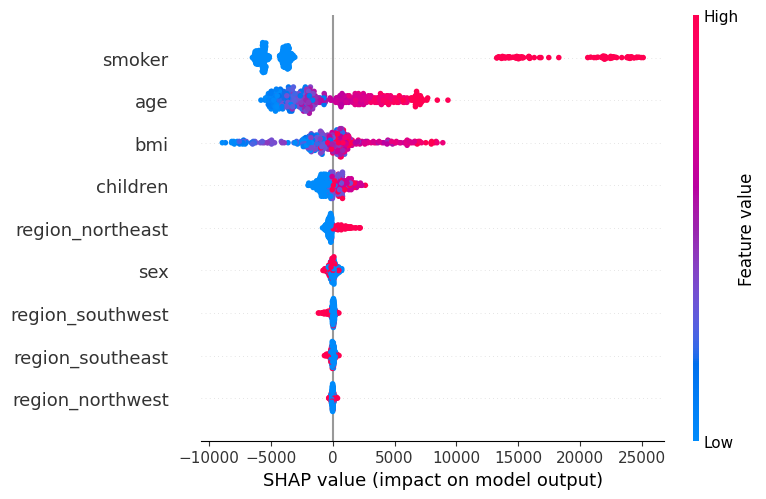

In [ ]:
shap.summary_plot(shap_values,test_ft)

- dependence_plot

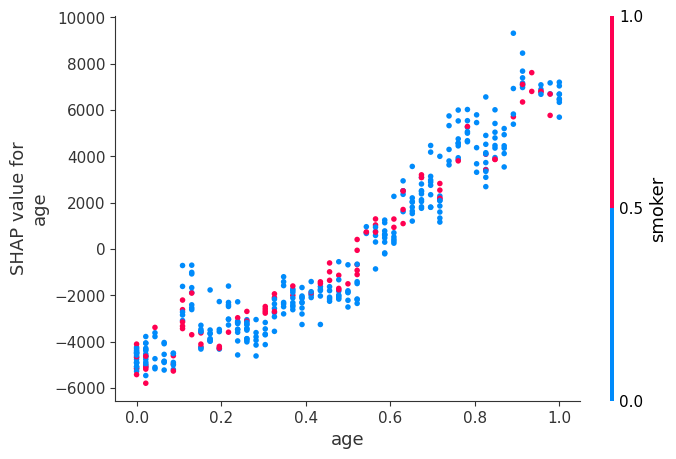

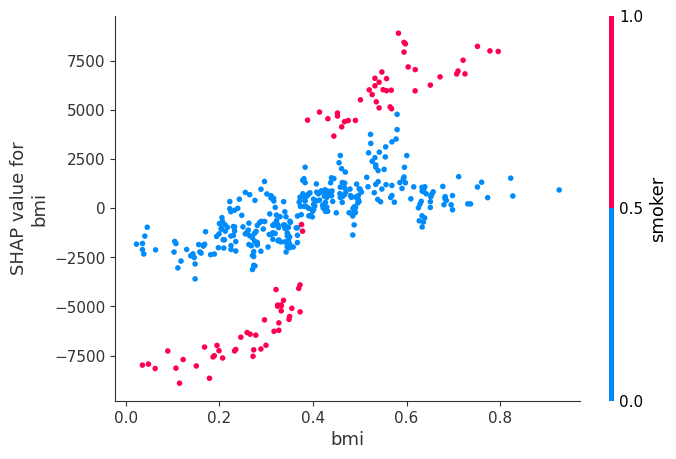

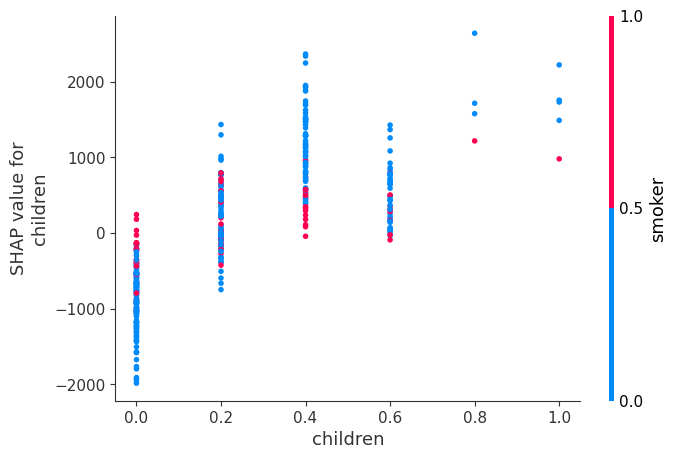

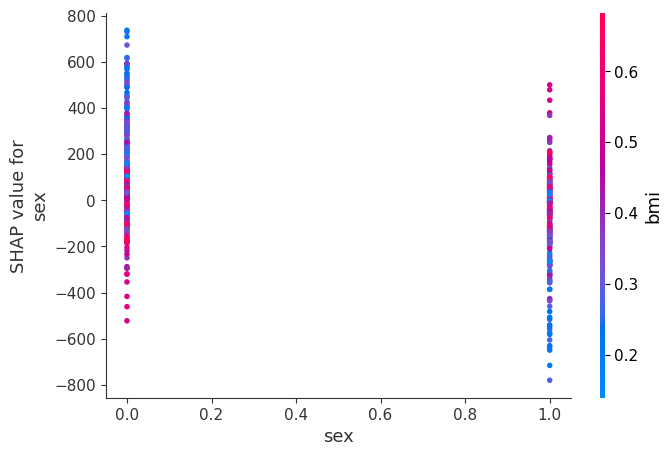

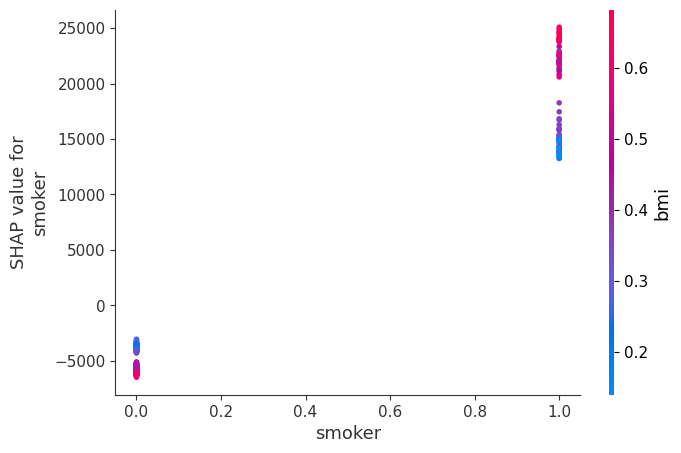

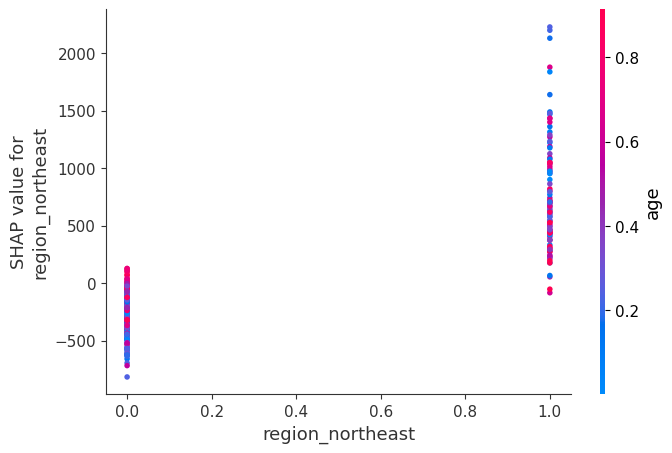

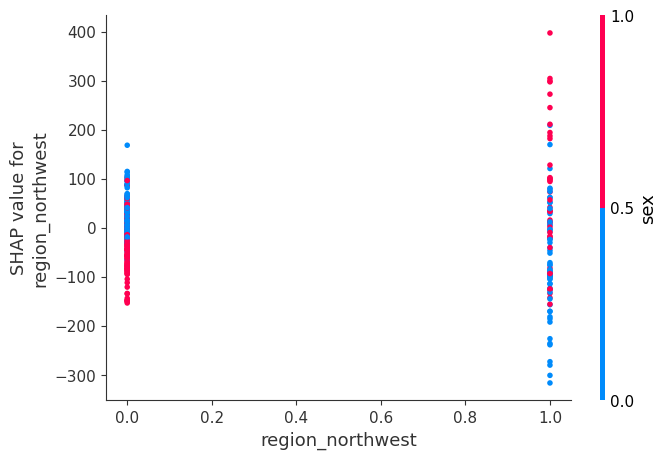

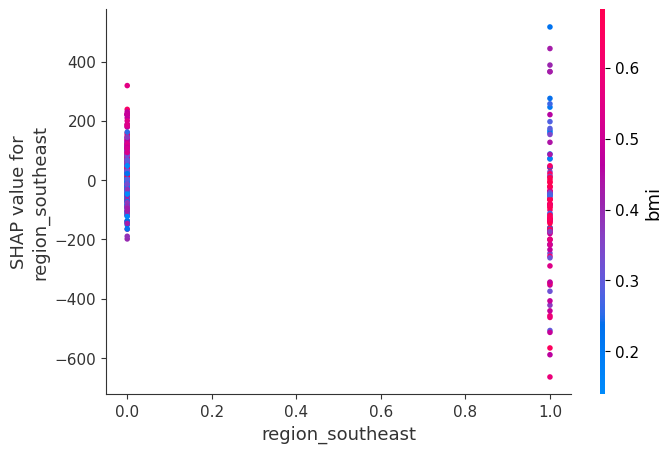

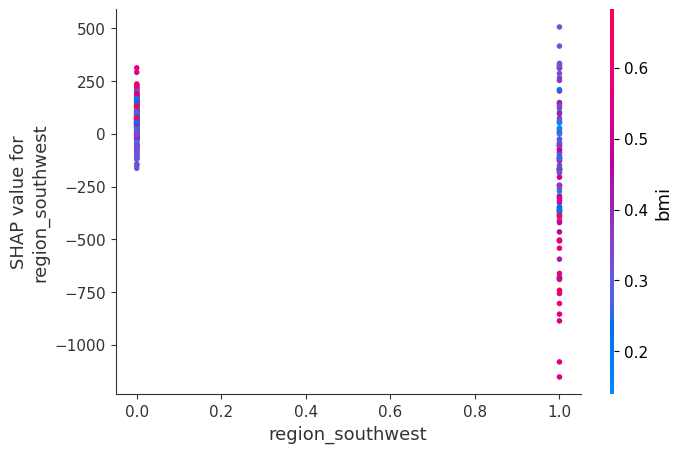

In [ ]:
for col in test_ft.columns:
    shap.dependence_plot(col, shap_values, test_ft)
    print()